In [25]:
import numpy as np # array operations
import cv2 #opencv library read img operations
import math
# data visualisation and manipulation
import matplotlib.pyplot as plt #show img and table
from pathlib import Path # 去掉副檔名

In [26]:
# 加密
def embedding(n:int, digit_ary:int, cover_img:np.ndarray, secret_digit:int):
    #digit_ary=2*n+1
    f=0
    for i in range(n):
        f+=cover_img[i]*(i+1)
    f=f % digit_ary
    s=(secret_digit-f) % digit_ary
    if(s!=0):#s=0 不用變動
        if(s<=n):
            cover_img[s-1]=cover_img[s-1]+1
            if(cover_img[s-1]>255 or cover_img[s-1]<0):
                if(cover_img[s-1]>255):
                    cover_img[s-1]=cover_img[s-1]-2
                else:
                    cover_img[s-1]=cover_img[s-1]+2
                embedding(n=n,digit_ary=digit_ary,cover_img=cover_img,secret_digit=secret_digit)
        else:
            change_index=digit_ary-s-1
            cover_img[change_index]=cover_img[change_index]-1
            if(cover_img[change_index]>255 or cover_img[change_index]<0):
                if(cover_img[change_index]>255):
                    cover_img[change_index]=cover_img[change_index]-2
                else:
                    cover_img[change_index]=cover_img[change_index]+2
                embedding(n=n,digit_ary=digit_ary,cover_img=cover_img,secret_digit=secret_digit)
        
    return cover_img
# embedding(n=4,digit_ary=9,cover_img=[14,13,9,4],secret_digit=7)

In [27]:
# 解密
def extraction(n:int, digit_ary:int, cover_img:np.ndarray):
    f=0
    for i in range(n):
        f+=cover_img[i]*(i+1)
    secret_digit=f % digit_ary
    return secret_digit
# extraction(n=4, digit_ary=9,cover_img=[14, 13, 9, 3])

In [28]:
# 輸出密碼 secret digit
def output_secret_txt(secret_digit:np.ndarray, L:int ,file_name:str):
    path = 'secret/' + file_name
    f = open(path, 'w', encoding="utf-8")
    temp=" "
    for i in range(len(secret_digit)):
        temp+=str(secret_digit[i])
        if((i+1) % L==0):
            f.write(temp+'\n')
            temp=" "
    f.close()

[numpy reverse](https://blog.csdn.net/weixin_42200930/article/details/109133980?spm=1001.2101.3001.6661.1&utm_medium=distribute.pc_relevant_t0.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-109133980-blog-82261651.pc_relevant_multi_platform_whitelistv3&depth_1-utm_source=distribute.pc_relevant_t0.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-1-109133980-blog-82261651.pc_relevant_multi_platform_whitelistv3&utm_relevant_index=1)

In [29]:
def binary_to_digitArr(secret_digit:np.ndarray, k:int, digit_ary:int):
    # 2進位 轉 10進位
    dec_num=0
    # 將 secret_digit 倒過來轉 也可用 secret_digit[::-1]
    reversed_arr = np.flip(secret_digit)
#     print("reversed_arr",reversed_arr)
    for i in range(len(secret_digit)):
        if(reversed_arr[i]==1):
            dec_num+=math.pow(2,i)
            
    # 10進位 轉 digit_ary(2*n+1)
    temp=[]
    for j in range(k):
        temp.append(math.floor(dec_num / math.pow(digit_ary,j)) % digit_ary)
    secret_arr=np.flip(temp)
    return secret_arr

In [30]:
def digitArr_to_binary(secret_digit:np.ndarray, L:int, digit_ary:int):
    # digit_ary(2*n+1) 轉 10進位
    # 將 secret_digit 倒過來轉 也可用 secret_digit[::-1]
    reversed_arr = np.flip(secret_digit)
#     print("reversed_arr",reversed_arr)
    dec_num=0
    for i in range(len(secret_digit)):
        dec_num+=reversed_arr[i] * math.pow(digit_ary,i)
        
    # 10進位 轉 2進位
    temp=[]
    for j in range(L):
        temp.append(math.floor(dec_num / math.pow(2,j)) % 2)
    secret_arr=np.flip(temp)
    return secret_arr

In [31]:
def optimalK(n:int,digit_ary:int):
    L=0
    k=1
    opt_k=1
    opt_L=0
    minLoss=1
    while(L<64):
        L=math.floor(k * math.log(digit_ary,2))
        # print("L",L)
        Loss=(math.pow(digit_ary,k)-math.pow(2,L))/math.pow(digit_ary,k)
        if(minLoss>Loss):
            minLoss=Loss
            opt_k=k
            opt_L=L
        k+=1
    print("minLoss",minLoss)
    print("opt_k=",opt_k,"opt_L",opt_L)
    return opt_k,opt_L
# opt_k,opt_L=optimalK(n=3,digit_ary=7)

minLoss 0.03656970513914103
opt_k= 11 opt_L 38
MSE= 0.1825408935546875
PSNR= 55.51720188756615
Cp= 7.5995941162109375
Efficiency= 41.63228287218925


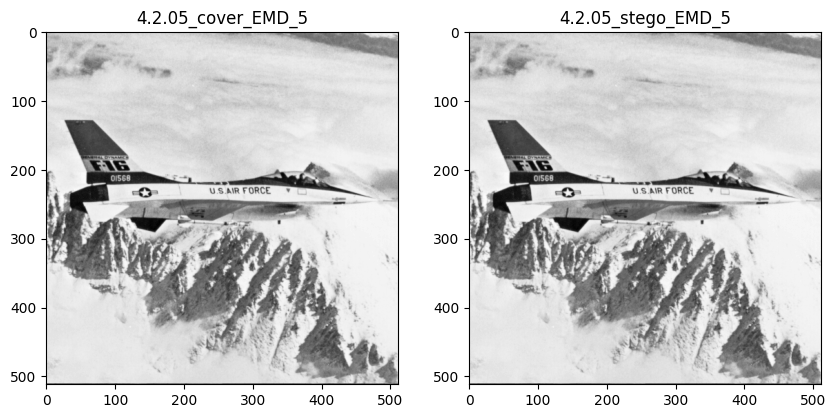

In [32]:
if __name__ == '__main__':
    n=0
    while n<2 or n>10:
        n = input("n≥2, n≤10為正整數 n: number of pixels in a cluster(n):")
        n = int(n)
    img_name = input("Input cover image:")
    # print(n,img_name)

    source_dir="source/"
    # cover imgPath
    imgPath = source_dir + img_name
    # convert img to array 以灰階格式讀取(二維)
    cover_gray = cv2.imread(imgPath ,cv2.IMREAD_GRAYSCALE)  
    # print(cover_gray)

    # 轉為一維
    cover_temp=cover_gray.copy()
    cover_temp=cover_temp.reshape(-1,)
    # print(cover_temp.shape)

    digit_ary=2*n+1
    opt_k,opt_L=optimalK(n=n,digit_ary=digit_ary)
    # pixels 總數: len(cover_temp) / 一組n個 = 組數 / k digit * L(一組 L bits)
    seedSize=math.floor(len(cover_temp)/n/opt_k)*opt_L
    # print(seedSize)
    np.random.seed(2022)
    # bitstream 0/1
    secret_digit=np.random.randint(2, size=seedSize)
    secret_file_name=Path(img_name).stem + "_secret_digit_"+ str(n) +".txt"
    output_secret_txt(secret_digit=secret_digit, L=opt_L,file_name=secret_file_name)

    # 加密
    # 將 0/1 bitstream 二進制密碼 轉為 digit array:(2n+1)進制密碼
    # bitstream to digit array secret
    temp=[]
    secretAll_arr=[]
    for i in range(len(secret_digit)):
        temp.append(secret_digit[i])
        if((i+1) % opt_L==0):
            secret_arr=binary_to_digitArr(secret_digit=temp, k=opt_k, digit_ary=digit_ary)
            secretAll_arr.append(secret_arr)
            temp=[]
    secretAll_arr=np.array(secretAll_arr).reshape(-1,)
    # print(secretAll_arr.shape)
    # print(secretAll_arr)

    stego_EMD=cover_temp.copy()
    index=0
    for i in range(len(secretAll_arr)):
        stego_EMD[index:index+n]=embedding(n=n,digit_ary=digit_ary,cover_img=cover_temp[index:index+n],secret_digit=secretAll_arr[i])
        index+=n

    # 解密 digit array:(2n+1)進制密碼
    secret_digitArray=[]
    index=0
    for i in range(len(secretAll_arr)):
        secret_digitArray.append(extraction(n=n, digit_ary=digit_ary,cover_img=stego_EMD[index:index+n]))
        index+=n
    # print("extract secret: ",secret_digitArray)

    # 將 digit array:(2n+1)進制密碼 轉回 0/1 bitstream 二進制密碼
    # digit array to bitstream secret
    temp=[]
    secret_bitArray=[]
    for i in range(len(secret_digitArray)):
        temp.append(secret_digitArray[i])
        if((i+1) % opt_k==0):
            secret_bitArray.append(digitArr_to_binary(secret_digit=temp, L=opt_L, digit_ary=digit_ary))
            temp=[]
    secret_bitArray=np.array(secret_bitArray).reshape(-1,)
    # print(secretAll_arr.shape)
    # print(secret_bitArray[:14])# [0,0,1,1,1,1,0,0,0,0,0,1,0,0]
    # print(secret_bitArray[14:14+opt_L])# [0,0,1,1,1,1,0,0,0,0,0,1,0,0]

    # 轉回二維
    stego_EMD=stego_EMD.reshape(cover_gray.shape,)
    # print(stego_EMD.shape)
    # print(stego_EMD)

    # 存 cover灰階圖 和 stego加密後圖
    cover_dir="cover/"
    cover_name=Path(img_name).stem + "_cover_EMD_"+ str(n) +".png"
    cv2.imwrite(cover_dir + cover_name, cover_gray)

    stego_dir="stego/"
    stego_name=Path(img_name).stem + "_stego_EMD_"+ str(n) +".png"
    cv2.imwrite(stego_dir+stego_name, stego_EMD)

    # 讀圖算MSE PSNR Cp Efficiency
    # cover imgPath
    cover_imgPath = cover_dir + cover_name
    # convert img to array 以灰階格式讀取(二維)
    cover_img = cv2.imread(cover_imgPath ,cv2.IMREAD_GRAYSCALE)
    cover_img=cover_img.reshape(-1,)

    # stego imgPath
    stego_imgPath = stego_dir+stego_name
    # convert img to array 以灰階格式讀取(二維)
    stego_img = cv2.imread(stego_imgPath ,cv2.IMREAD_GRAYSCALE)
    stego_img=stego_img.reshape(-1,)
    
    # MSE:distortion per pixel PSNR Cp:bpp(Embedding rate)
    # MSE in n pixels:2/(2n+1)
    MSE=sum((cover_img-stego_img)**2) / len(cover_img)
    # PSNR 10*log(255*255/(2/(2n+1))
    PSNR=10*math.log(255**2/MSE,10)
    Cp=(math.floor(len(cover_img)/n/opt_k) * opt_k * opt_L) / (len(cover_img))
    # Efficiency = ((2*n+1)*opt_L) / (2*n)
    Efficiency=Cp/MSE
    print("MSE=",MSE)
    print("PSNR=",PSNR)
    print("Cp=",Cp)
    print("Efficiency=",Efficiency)

    # 印出未加密灰階圖片
    plt.figure(figsize=(10,10))
    plt.subplot(121)
    plt.title(Path(cover_name).stem)
    plt.imshow(cover_gray,cmap = 'gray')

    # 印出加密圖片
    plt.subplot(122)
    plt.title(Path(stego_name).stem)
    plt.imshow(stego_EMD,cmap = 'gray')
    plt.show()
